In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
import os.path

folder = os.path.join('..', 'Cyberdata','CyberAttack_OctJune16.csv')

df = pd.read_csv(folder, sep=',')
display(df[:5])
df.ID.groupby(df.Attack).count()

,ID,Date,Author,Target,Description,Attack,TargetClass,AttackClass,Country,Link,Tags
0,1,01/09/2016,?,Last.fm,More than 43 million of user records from UK-b...,Unknown,Online Music,CC,UK,http://www.zdnet.com/article/hackers-stole-43-...,Last.fm
1,2,01/09/2016,APT3,2 Hong Kong Government Agencies.,Security company FireEye reveals that two Hong...,Targeted Attack,Government,CE,HK,http://www.bloomberg.com/news/articles/2016-09...,"FireEye, Hong Kong"
2,3,01/09/2016,?,Btc-E.com,"LeakedSource reveals that Btc-E.com had 568,35...",Unknown,Bitcoin Exchange,CC,US,https://www.databreaches.net/bitcoin-exchange-...,"LeakedSource, Btc-E.com"
3,4,01/09/2016,?,Bitcointalk.org,LeakedSource reveals that Bitcointalk.org had ...,Unknown,Online Forum,CC,US,https://www.databreaches.net/bitcoin-exchange-...,"LeakedSource, Bitcointalk.org"
4,5,01/09/2016,?,University of New Mexico,"Over 1,000 former students and employees of UN...",Unknown,Education,CC,US,http://www.dailylobo.com/article/2016/09/1-unm...,"University of New Mexico, UNM"


Attack
Account Hijacking                                        91
Account Hijacking (via a third party vendor)              2
Account Hijacking via Telegram Vulnerability              3
Bots                                                      2
Brute Force                                               1
Credential Stuffing                                       1
Cripto Currency Vulnerability                             1
DDoS                                                     68
DNS Hijacking                                             2
Defacement                                               24
DoS                                                       1
Email Harvesting                                          1
FTP Vulnerability                                         1
Local File Inclusion                                      1
Malicious Code Injection                                  2
Malicious JS injection                                    1
Malicious JS redirection         

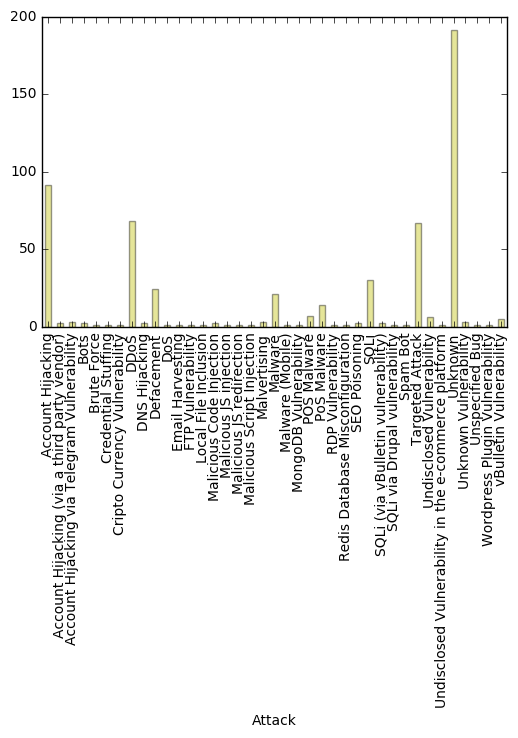

In [110]:
df.ID.groupby(df.Attack).count().plot(kind='bar', alpha=0.4, color='y')
plt.show()

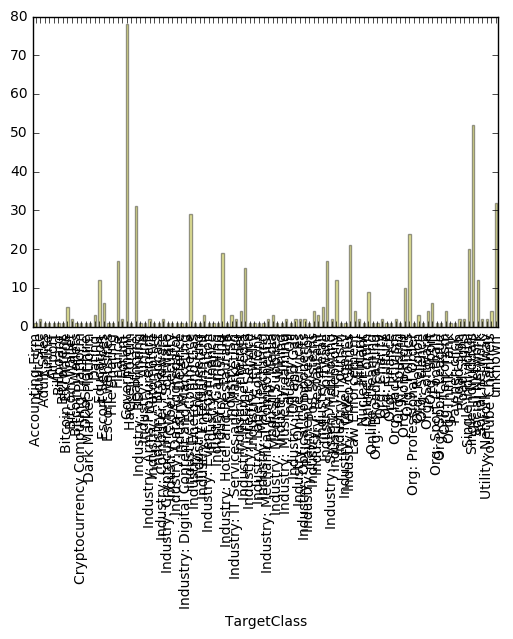

In [94]:
fig
df.ID.groupby(df.TargetClass).count().plot(kind='bar', alpha=0.4, color='y');
plt.show()

In [111]:
df.Attack = df.Attack.str.lower()
df.TargetClass = df.TargetClass.str.lower()

In [139]:
mostTarget = df.ID.groupby(df.TargetClass).count()
#print(df.TargetClass.value_counts())
df.loc[df['TargetClass']=='Org: Political Party', 'TargetClass'] = 'Org: Politics'
df.loc[df['TargetClass']== 'Industry: Software', 'TargetClass'] = 'Industry: Software'
df.loc[df['TargetClass']== 'Industry: PoS Software', 'TargetClass'] = 'Industry: Software'
df.loc[df['TargetClass']== 'Industry: Shoes', 'TargetClass'] = 'Industry: E-Commerce'
df.loc[df['TargetClass']== 'Industry: Internet Services', 'TargetClass'] = 'Industry: E-Commerce'
df.loc[df['TargetClass']== 'Industry: internet Services', 'TargetClass'] = 'Industry: E-Commerce'
df.loc[df['TargetClass']== 'Industry: Fashion', 'TargetClass'] = 'Industry: E-Commerce'
df.loc[df['TargetClass']== 'Online Services', 'TargetClass'] = 'Industry: E-Commerce'
df.loc[df['TargetClass']== 'Industry: Mobile Telco', 'TargetClass'] = 'Industry: Telephony'
df.loc[df['TargetClass']== 'Industry: Telco', 'TargetClass'] = 'Industry: Telephony'
df.loc[df['TargetClass']== 'Industry: Web Hosting', 'TargetClass'] = 'Industry: Hosting'
df.loc[df['TargetClass']== 'Industry: Hosting Provider', 'TargetClass'] = 'Industry: Hosting'
df.loc[df['TargetClass']== 'Industry: Hotel and Hospitality', 'TargetClass'] = 'Industry: Hosting'
df.loc[df['TargetClass']== 'Industry: Financial Services', 'TargetClass'] = 'Finance'
df.loc[df['TargetClass']== 'News', 'TargetClass'] = 'Industry: Internet Media'
df.loc[df['TargetClass']== 'Social Media', 'TargetClass'] = 'Industry: Internet Media'
df.loc[df['TargetClass']== 'Online Music', 'TargetClass'] = 'Industry: Music Streaming'
df.loc[df['TargetClass']== 'Industry: Financial Services', 'TargetClass'] = 'Finance'
df.loc[df['TargetClass']== 'Industry: Financial Services', 'TargetClass'] = 'Finance'
df.loc[df['TargetClass']== '>1', 'TargetClass'] = 'unknown'


print(df.TargetClass.value_counts()[:10])

government               78
single individuals       52
unknown                  32
healthcare               31
org: political party     23
industry: video games    21
single individual        20
industry: software       15
finance                  15
social network           14
Name: TargetClass, dtype: int64


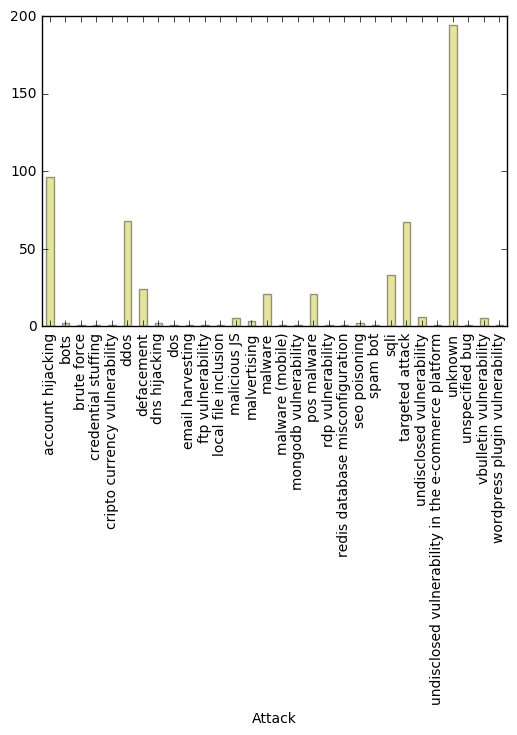

In [132]:
cats = df.Attack.astype('category').cat.categories

cats = (cat for cat in cats if 'account hijacking' in cat)
for cat in cats:
    df.loc[df['Attack']==cat, 'Attack'] = 'account hijacking'

cats = df.Attack.astype('category').cat.categories
cats = (cat for cat in cats if 'malicious' in cat)
for cat in cats:
    df.loc[df['Attack']==cat, 'Attack'] = 'malicious JS'

cats = df.Attack.astype('category').cat.categories
cats = (cat for cat in cats if 'unknown' in cat)
for cat in cats:
    df.loc[df['Attack']==cat, 'Attack'] = 'unknown'

cats = df.Attack.astype('category').cat.categories
cats = (cat for cat in cats if 'sqli' in cat)
for cat in cats:
    df.loc[df['Attack']==cat, 'Attack'] = 'sqli'
    
df.ID.groupby(df.Attack).count().plot(kind='bar', alpha=0.4, color='y')
plt.show()

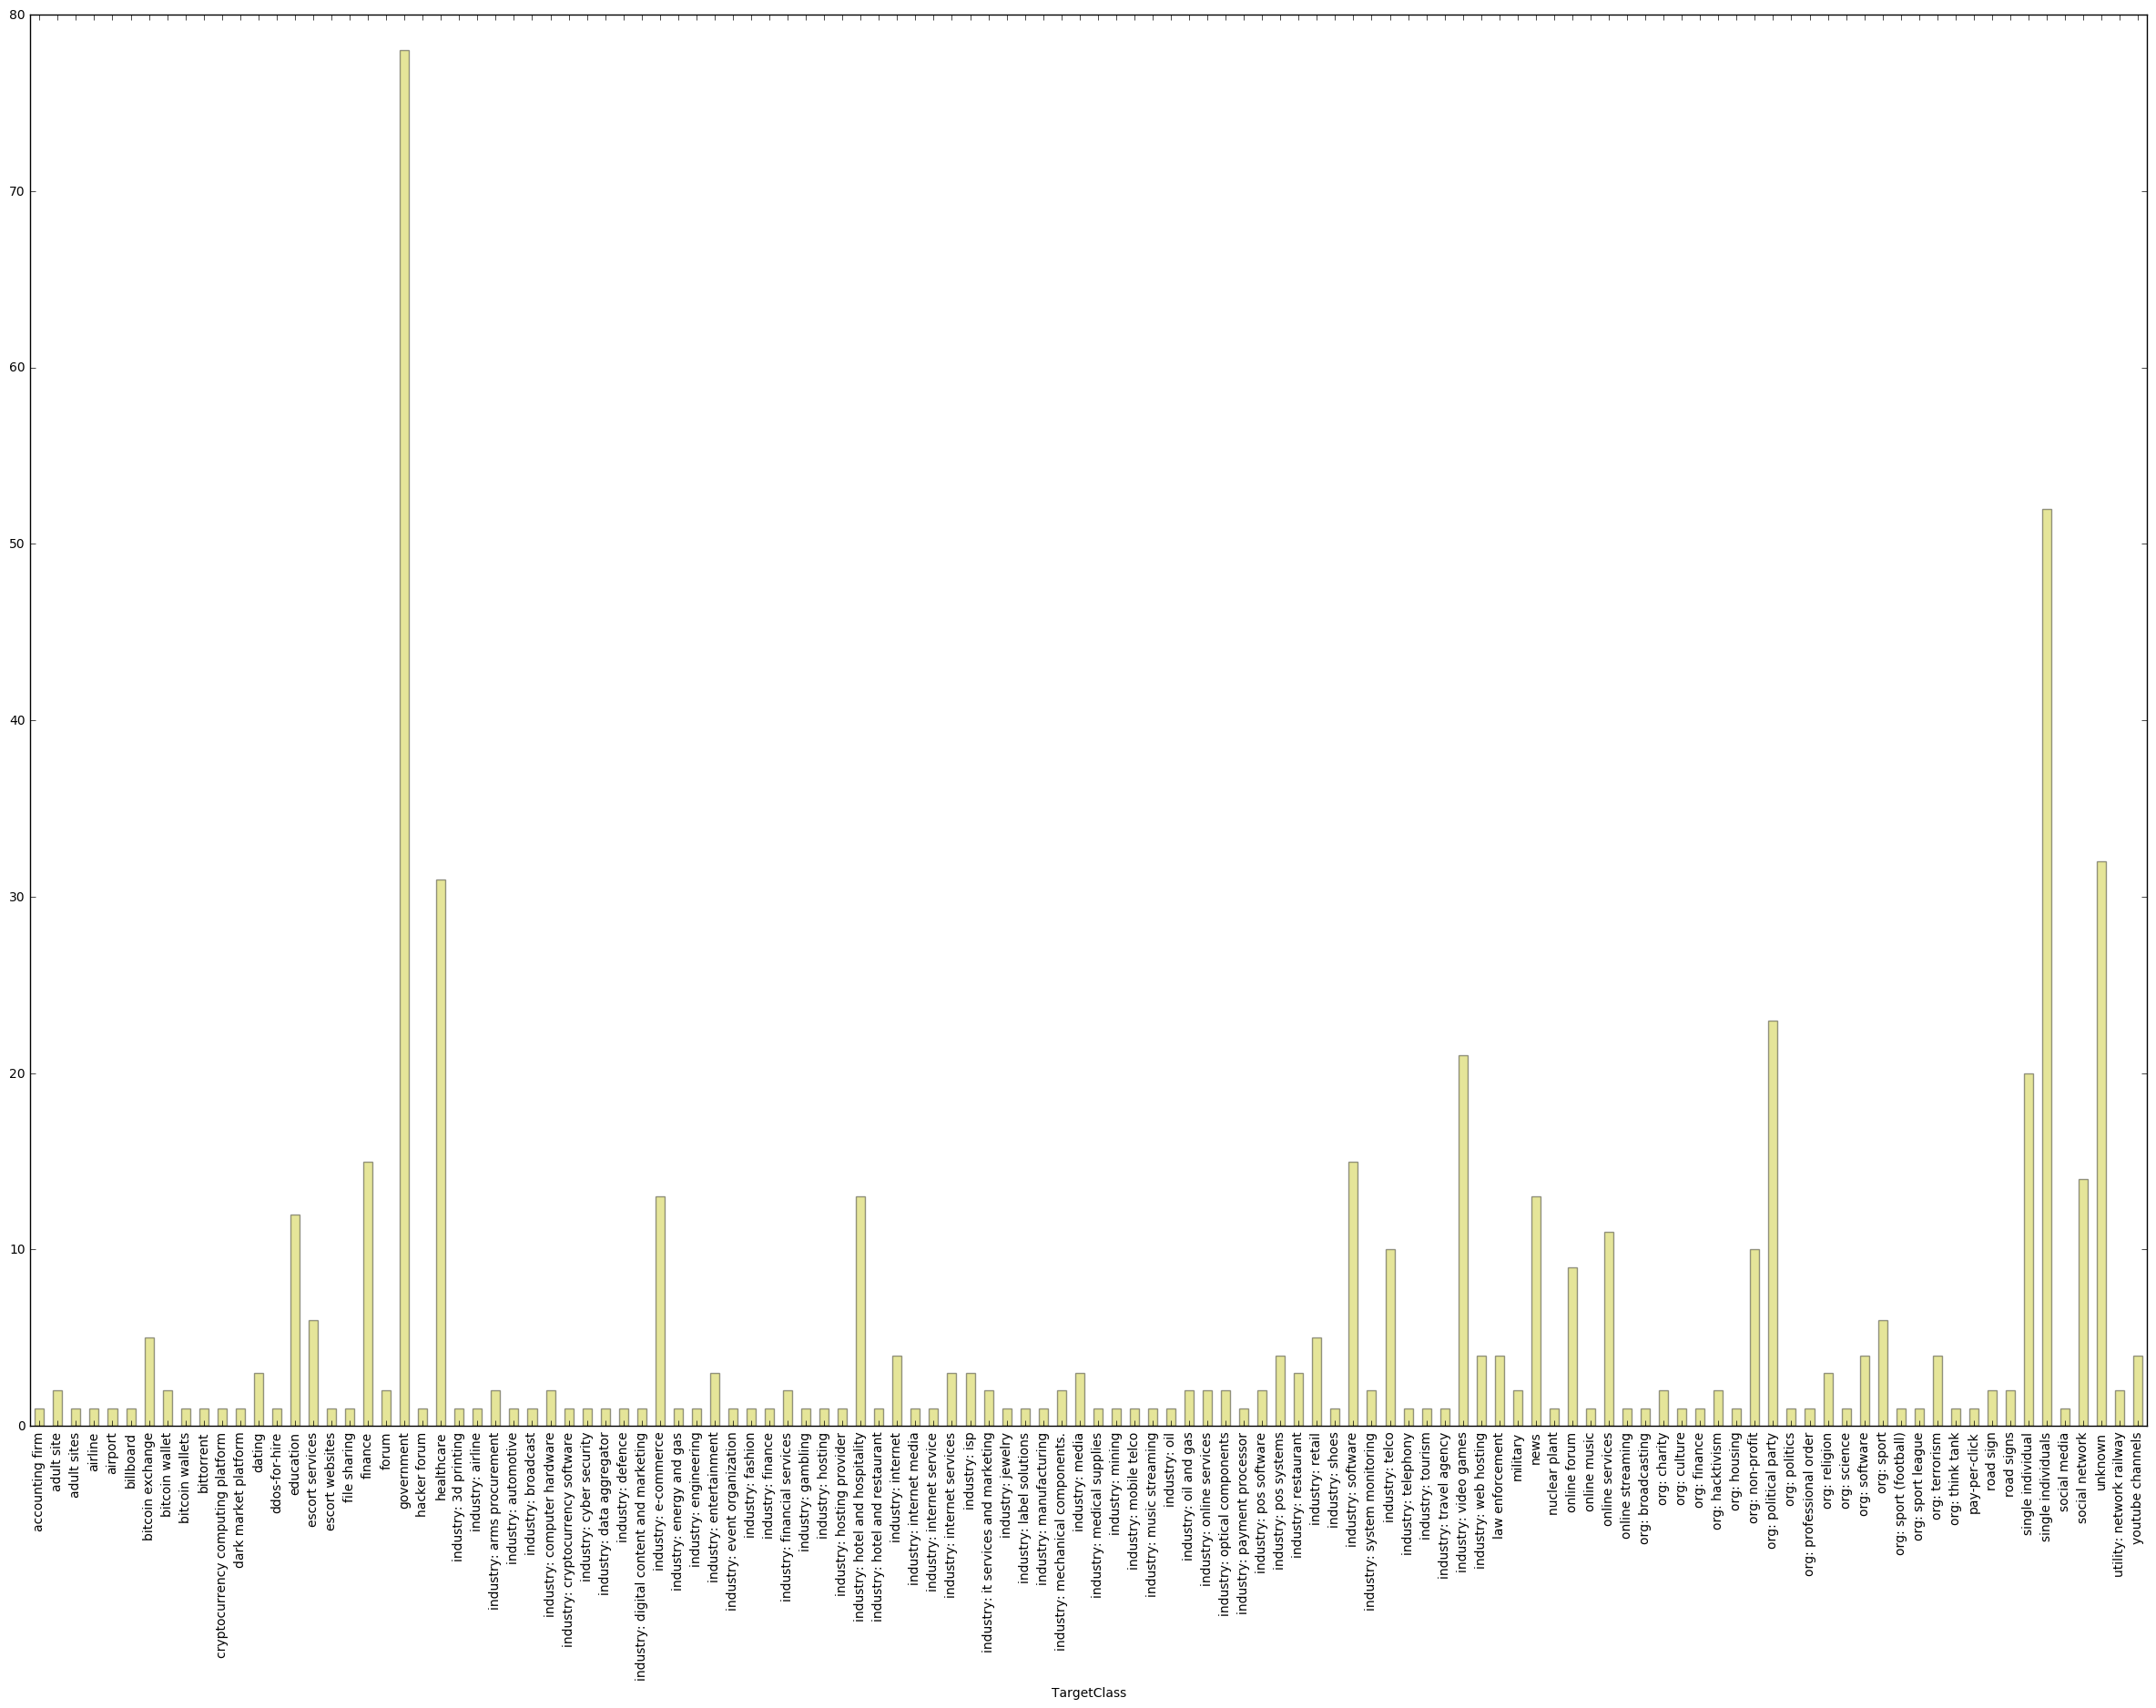

In [128]:
fig
df.ID.groupby(df.TargetClass).count().plot(kind='bar', alpha=0.4, color='y',figsize=(30,20));
plt.show()

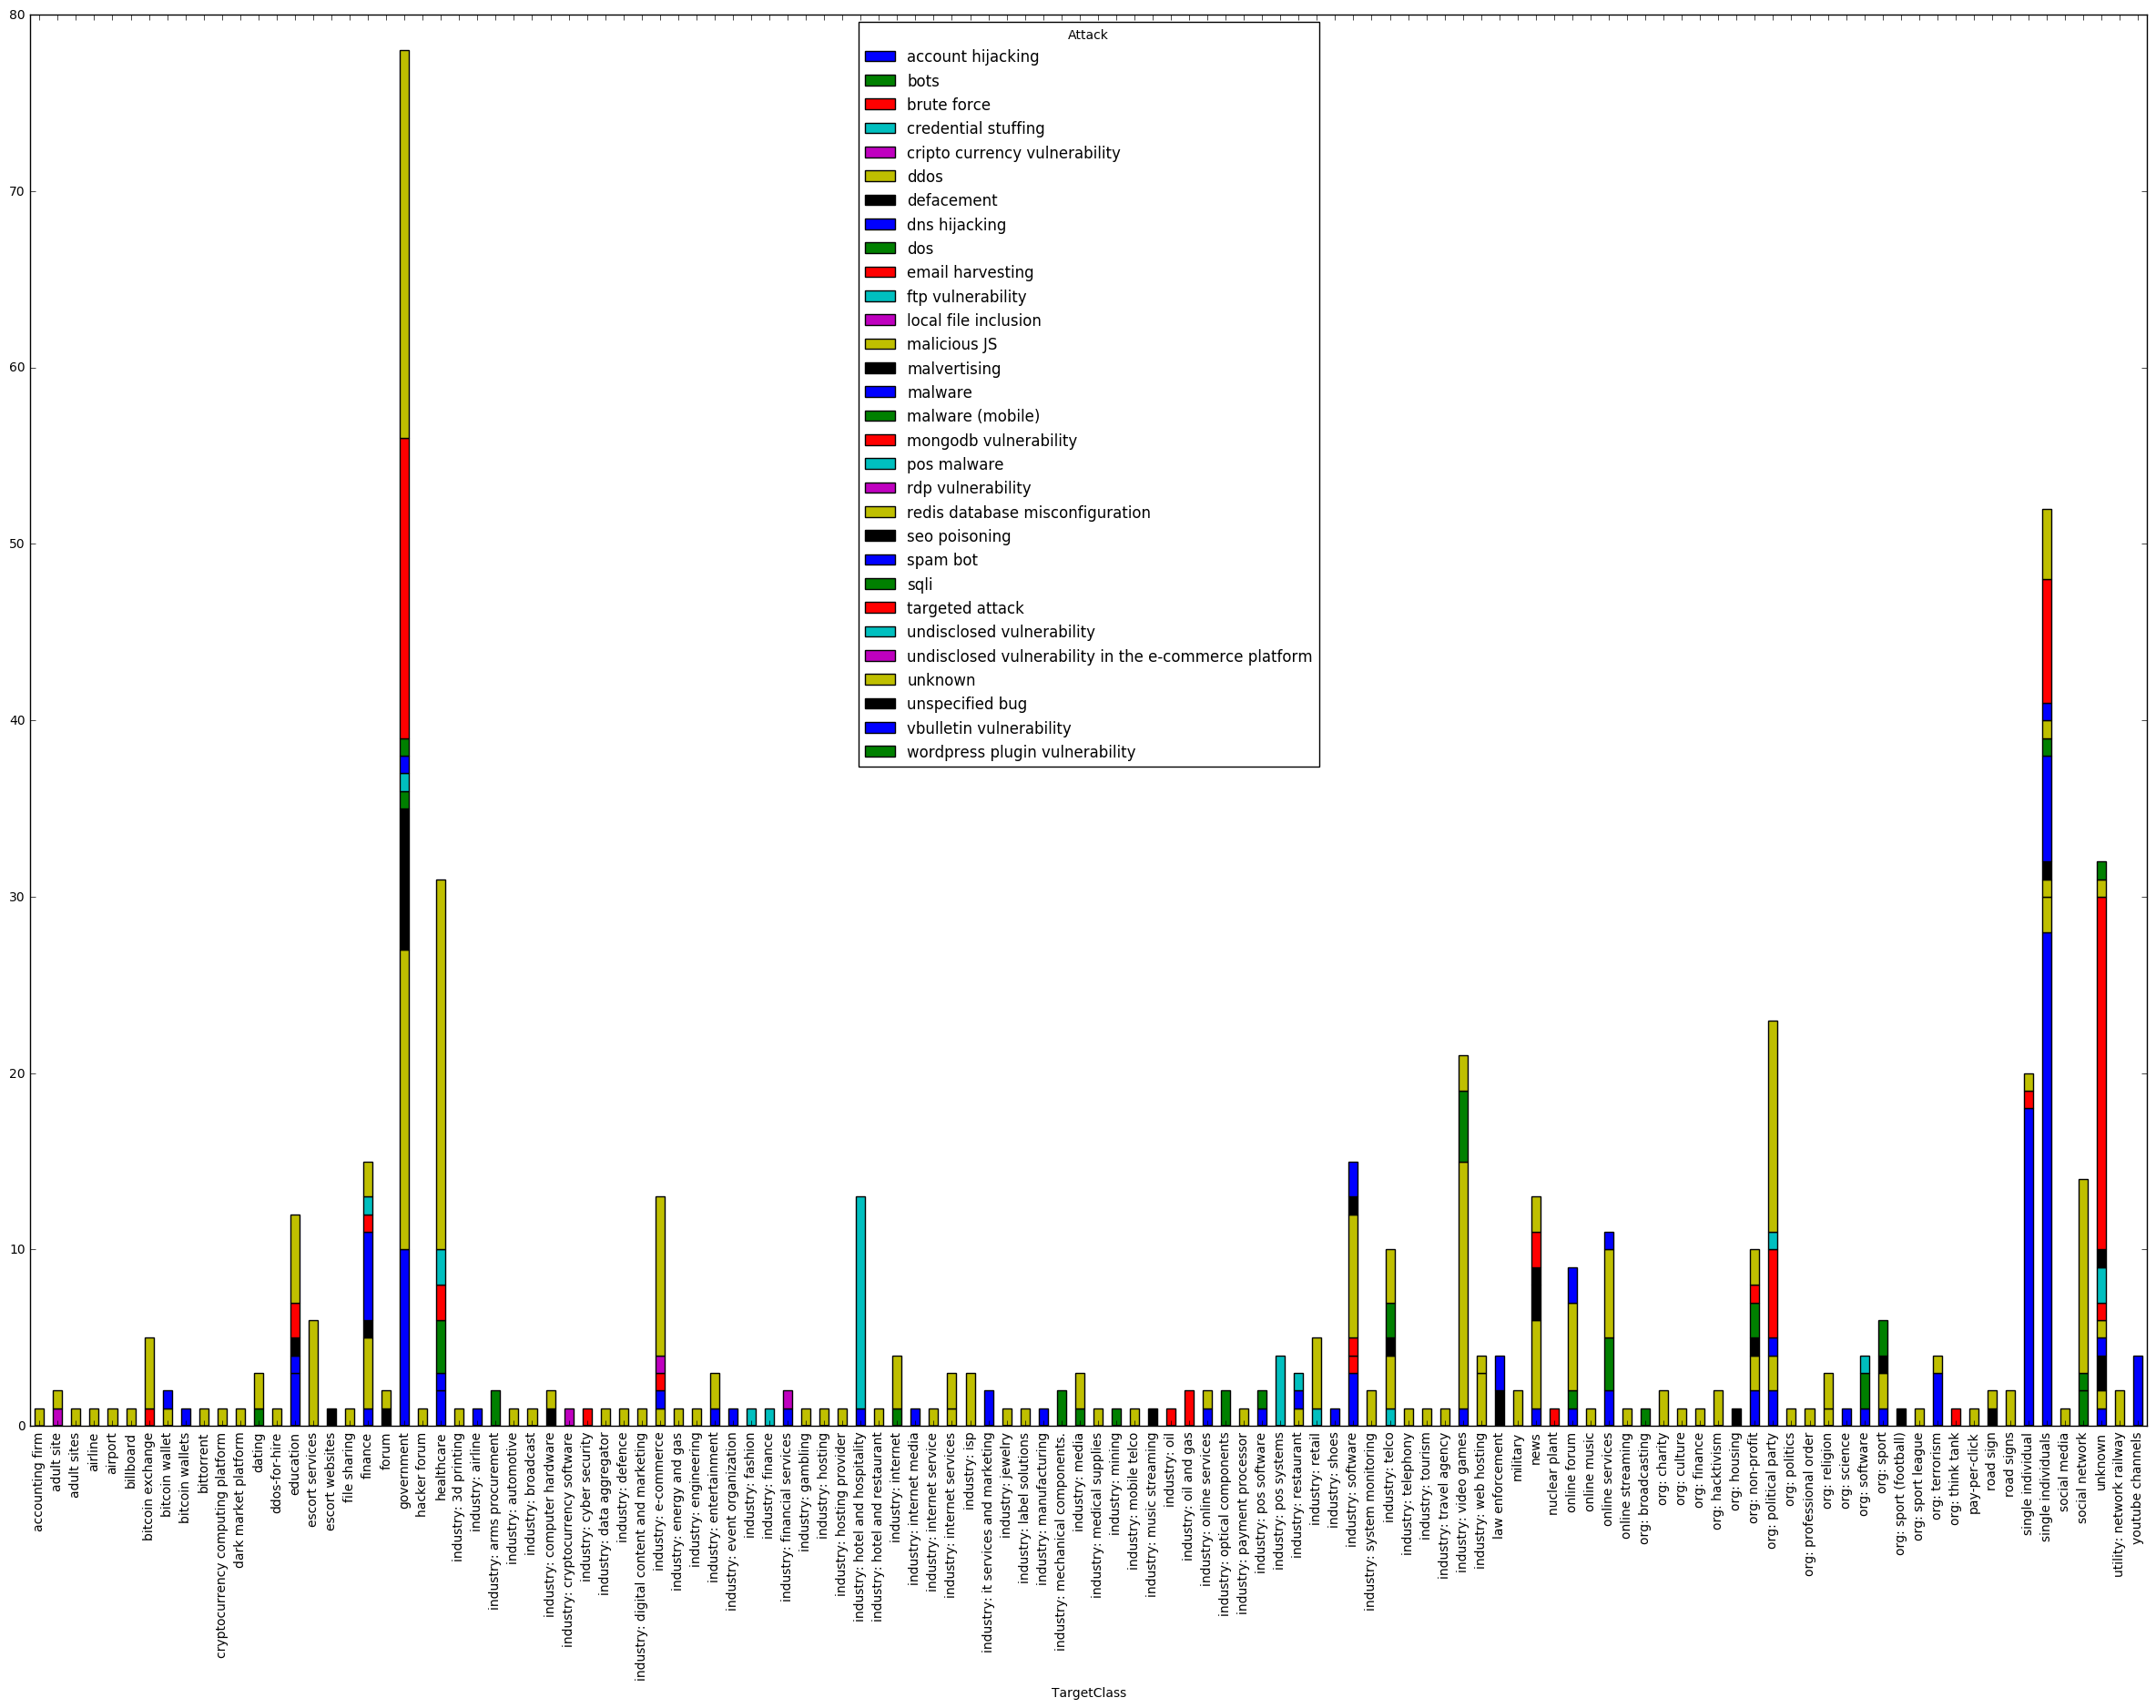

TargetClass      Attack              
accounting firm  unknown                 1
adult site       local file inclusion    1
                 unknown                 1
adult sites      unknown                 1
airline          unknown                 1
Name: TargetClass, dtype: int64

In [130]:
from matplotlib.widgets import Cursor
a = df.groupby(['TargetClass','Attack'])['TargetClass'].count().unstack('Attack').fillna(0)
a.plot(kind='bar',stacked=True,figsize=(30,20))
#cursor = Cursor(ax, useblit=True, color='red', linewidth=2)
#labels = plt.xticks()
#plt.setp(labels,)
plt.show()
#b = pd.get_dummies(df.Attack)


In [137]:
df_mostAttacked = df.TargetClass.value_counts()[:10]
a = df_mostAttacked.groupby(['TargetClass','Attack'])['TargetClass'].count().unstack('Attack').fillna(0)
a.plot(kind='bar',stacked=True,figsize=(30,20))

KeyError: 'TargetClass'

In [30]:
from sklearn import preprocessing

leAttack = preprocessing.LabelEncoder()
leAttack.fit(df.Attack)
df.Attack = leAttack.transform(df.Attack) 

leAttackClass = preprocessing.LabelEncoder()
leAttackClass.fit(df.AttackClass)
df.AttackClass = leAttackClass.transform(df.AttackClass) 

letarget = preprocessing.LabelEncoder()
#letarget.fit(df.TargetClass)
#df.TargetClass = letarget.transform(df.TargetClass)

leCountry = preprocessing.LabelEncoder()
#leCountry.fit(df.Country)
#df.Country = leCountry.transform(df.Country) 

#a = list(le.inverse_transform(a))
np.unique(df.TargetClass)
#print(df.TargetClass[df.TargetClass!='>1'])

TypeError: unorderable types: str() > float()

TargetClass                        Attack                         
airport                            unknown                             1
billboard                          unknown                             1
bitcoin exchange                   targeted attack                     1
                                   unknown                             4
bitcoin wallet                     ddos                                1
                                   dns hijacking                       1
bitcoin wallets                    account hijacking                   1
bittorrent                         unknown                             1
cryptocurrency computing platform  ddos                                1
dark market platform               unknown                             1
dating                             sqli                                1
                                   unknown                             2
ddos-for-hire                      unknown               

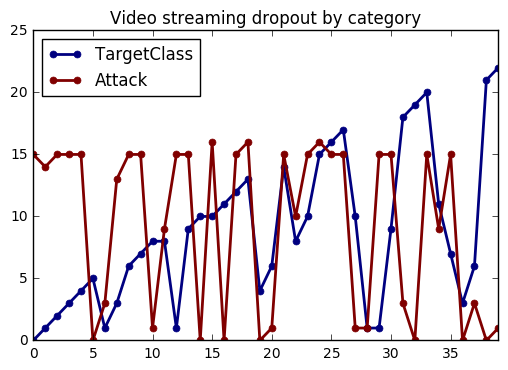

In [213]:
df2 = pd.DataFrame(df, columns=['TargetClass', 'Attack'], index=TargetClassIndex)
df2.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Video streaming dropout by category')

fig
plt.show()

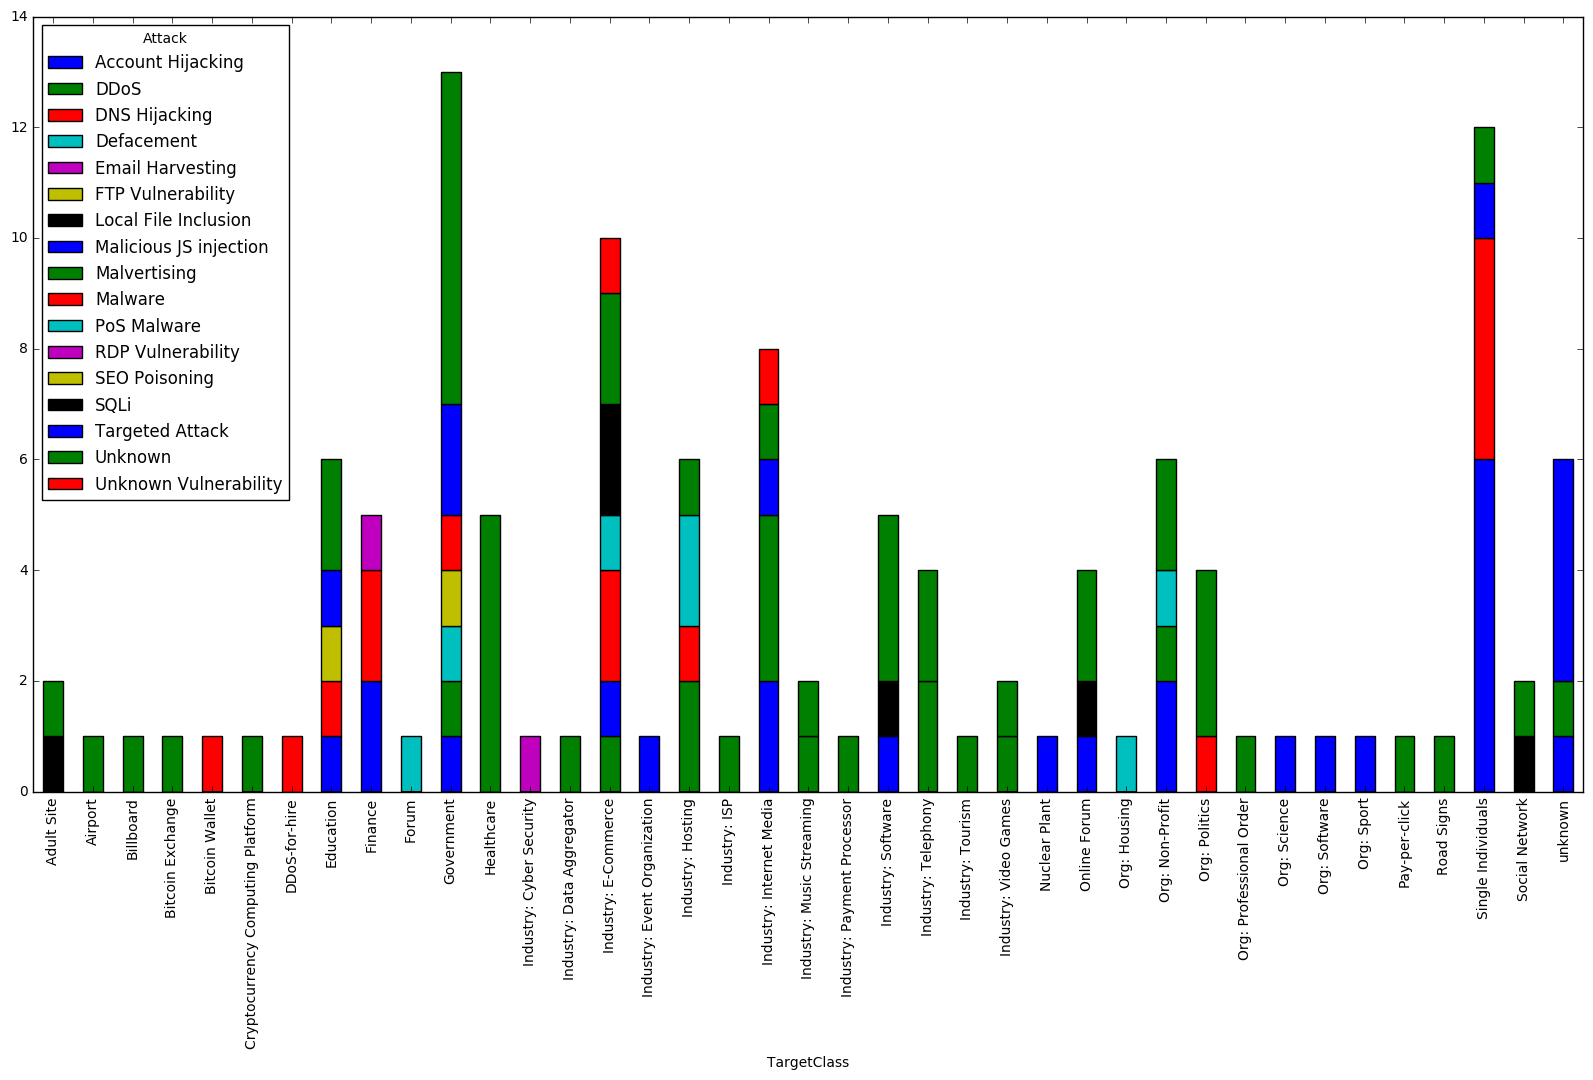

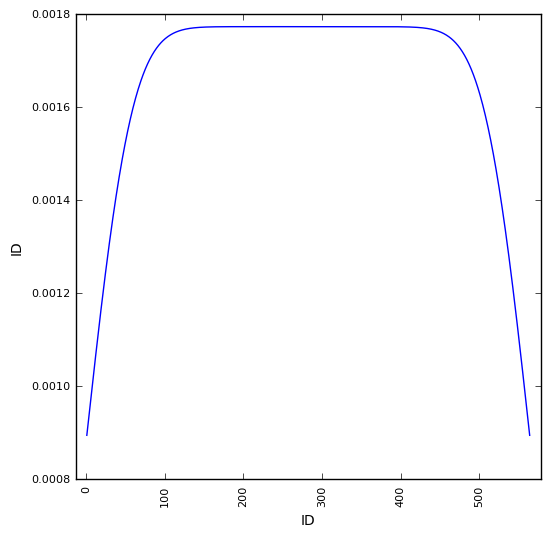

In [88]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

In [177]:
df.describe()

,ID,Attack,AttackClass
count,124.000000,124.000000,124.00000
mean,62.500000,9.233871,0.41129
std,35.939764,6.296352,0.91075
min,1.000000,0.000000,0.00000
25%,31.750000,1.000000,0.00000
50%,62.500000,13.000000,0.00000
75%,93.250000,15.000000,0.00000
max,124.000000,16.000000,3.00000


In [165]:
pd.concat([df.describe(), df.loc[:,'Date':'AttackClass'].describe()], axis=1)

,ID,Attack,Attack
count,124.000000,124.000000,124.000000
mean,62.500000,9.233871,9.233871
std,35.939764,6.296352,6.296352
min,1.000000,0.000000,0.000000
25%,31.750000,1.000000,1.000000
50%,62.500000,13.000000,13.000000
75%,93.250000,15.000000,15.000000
max,124.000000,16.000000,16.000000


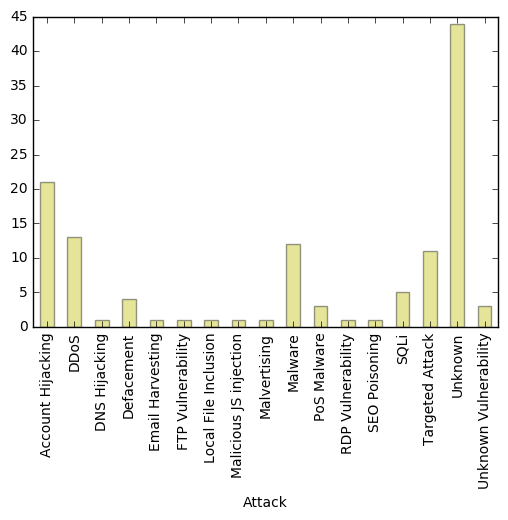

In [25]:
# this is another type for factorization of string series
a = pd.factorize(df.TargetClass)
df.TargetClass = a[0]
TargetClassIndex = a[1]
df.Attack.groupby(df.TargetClass).count().plot(kind='bar', alpha=0.4, color='y');
fig

#a.T.plot.bar(stacked=True);
plt.show()
